# Bike Share Demand Prediction Using Linear Regression

<h2>Forecast use of a city bikeshare system</h2>
<p/>
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must <b>predict the <u>total count of bikes rented</u> during each hour</b> covered by the test set, using only information available prior to the rental period.
<p/>
<b>Data Fields</b>
<br/>
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

## Reading in the data

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

In [17]:
#reading data from GitHub and set the datetime as index
import pandas as pd
url = 'https://raw.githubusercontent.com/kashyap-mantri/MachineLearning/master/Datasets/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
#renaming COUNT column with TOTAL
bikes.rename(columns = {'count':'total'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Visualizing the data

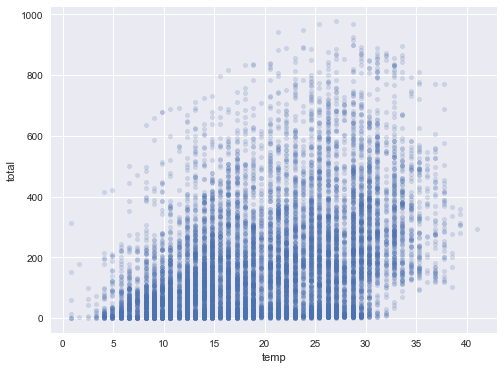

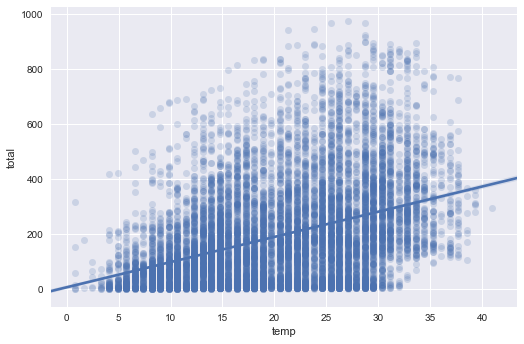

In [46]:
#Visualizing Data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#adjusting plot dimensions and position in pandas
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['font.size']=14
#pandas scatter plot
bikes.plot(x='temp',y='total', kind='scatter', alpha=0.2)

#seaborn scatterplot with Regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})


# Building Linear Regression Model

In [48]:
#create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

#import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

#print coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.04621295962
[ 9.17054048]


In [49]:
#using model for prediction, bikes @ 25 degrees?
#calculating manually
print(linreg.intercept_ + linreg.coef_*25)

#use model to predict
linreg.predict(25)

[ 235.309725]


array([ 235.309725])

# Does the scale of feature matters?
lets say the temperature is measured in Fahrenheit rather that Celcius. How would that effect the model?

In [50]:
#change C to F and create a new column
bikes['temp_f'] = bikes.temp*1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_f
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


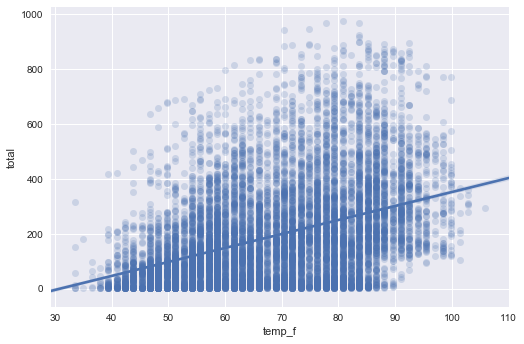

In [51]:
# seaborn plot + Regression line

sns.lmplot(x='temp_f', y='total', data = bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [52]:
#create X and y
feature_cols=['temp_f']
X = bikes[feature_cols]
y = bikes.total

#instantiate and fit
linreg =LinearRegression()
linreg.fit(X,y)

#print coefficients
print(linreg.intercept_)
print(linreg.coef_)

-156.985617821
[ 5.09474471]


In [53]:
#convert 25C to F
print(25*1.8+32)

#using model to predict 77F
linreg.predict(77)

77.0


array([ 235.309725])

**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

In [59]:
bikes.drop('temp_f', axis=1, inplace=True)

# Working with multiple features

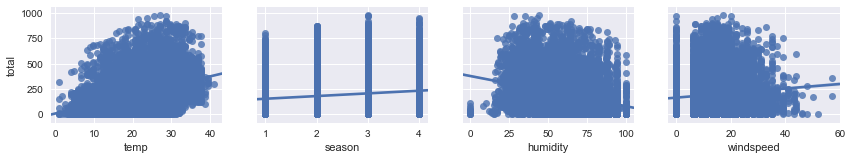

In [71]:
#adding multiple features
feature_cols=['temp','season','humidity','windspeed']

#multiple plotter using seaborn package
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg', aspect = 1.2)

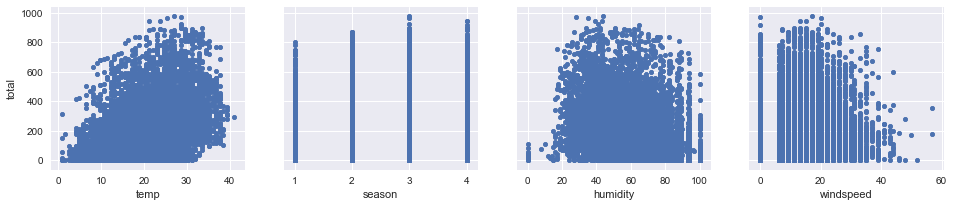

In [72]:
#multiple plot using pandas and for loop

fig, axs = plt.subplots(1, len(feature_cols), sharey = True)

for index, feature in enumerate(feature_cols):
    bikes.plot(x=feature, y='total', kind='scatter', ax=axs[index], figsize=(16,3))

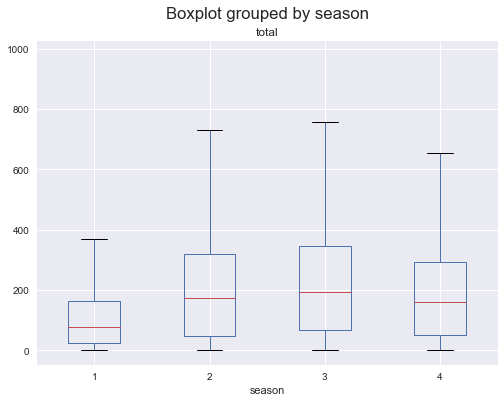

In [86]:
#boxplot by season

bikes.boxplot(column='total', by='season')

Notably:

- A line can't capture a non-linear relationship.
- There are more rentals in winter than in spring (?)

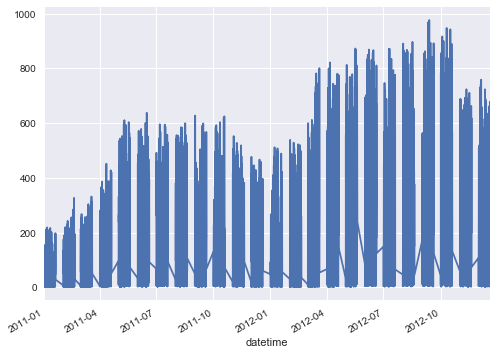

In [87]:
#lineplot for total rentals
bikes.total.plot()

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

So let's build a **Correlation Matrix** (rabges from -1 to 1) to know further dependencies of features on 'total'

In [88]:
#correlation matrix

bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


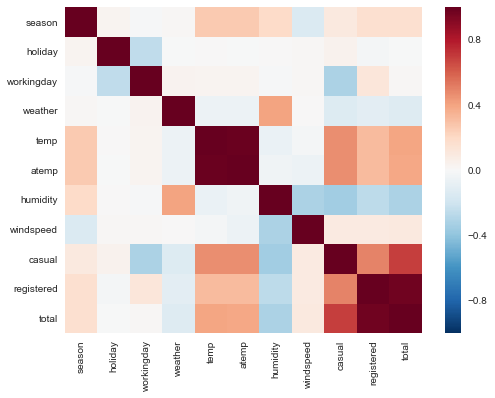

In [89]:
#heat map for correlation matrix

sns.heatmap(bikes.corr())

Do you observe any relationships?

## Adding more features to the model

In [95]:
#creating feature vector
feature_cols=['temp', 'season', 'weather', 'humidity']

#create X and y
X = bikes[feature_cols]
y = bikes.total

#instantiate and fit
linreg = LinearRegression()
linreg.fit(X,y)

#coefficients
print(linreg.coef_)
print(linreg.intercept_)

[  7.86482499  22.53875753   6.67030204  -3.11887338]
159.520687861


In [96]:
#pairing feature names with coefficient

list(zip(feature_cols, linreg.coef_))

[('temp', 7.8648249924774083),
 ('season', 22.538757532466601),
 ('weather', 6.6703020359238376),
 ('humidity', -3.1188733823965045)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of 3.12 bikes**.

Does anything look incorrect?

You could understand the issue if you closely observe **season** and **weather** coefficients.

## Comapring models with train_test_split and RMSE

In [98]:
import numpy as np
from sklearn import metrics

#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

#define function that accepts features and returns RMSE value
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=123)
    linreg=LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred=linreg.predict(X_test)
    return np.sqrt(metrics.mean_squred_error(y_test, y_pred))

In [113]:
#passing features to the above function

print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season', 'humidity', 'windspeed']))

155.649459131
164.165399763
155.598189367
155.480060397


In [108]:
# using these as features is not allowed!
#print (train_test_rmse(['casual', 'registered']))

2.76616750363e-13


## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [112]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 192.26451139,  192.26451139,  192.26451139, ...,  192.26451139,
        192.26451139,  192.26451139])

In [110]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727